In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [60]:
# ===== Load dataset =====
equal = pd.read_csv('/workspaces/Honors_Project/data_generation/participant_data_equal_condition.csv').drop(equal.columns[2], axis=1)

# Label
y = equal.iloc[:, 0].values  

# Participant feature sets
X_p1 = equal.iloc[:, 3:6].values
X_p2 = equal.iloc[:, 6:9].values
X_p3 = equal.iloc[:, 9:12].values

# Dictionary to store participants
participants = {
    "Participant 1": X_p1,
    "Participant 2": X_p2,
    "Participant 3": X_p3
}

print(len(X_p3))

5000


In [54]:
# ===== Master training function =====
def train_and_evaluate(X, y, model, model_name, participant_name):
    """
    Train a given model pipeline on participant data and return evaluation metrics & ROC info.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

    # Create a pipeline (scaling + model)
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    
    # Accuracy
    acc = accuracy_score(y_test, predictions)
    print(f"\n{participant_name} — {model_name}")
    print("Accuracy:", acc)
    
    # Classification report
    print(classification_report(y_test, predictions))
    
    # ROC data (only if model supports predict_proba)
    if hasattr(pipeline.named_steps['classifier'], "predict_proba"):
        y_scores = pipeline.predict_proba(X_test)[:, 1]
    else:
        # For models without predict_proba (like SVC with linear kernel), use decision_function
        y_scores = pipeline.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    
    return pipeline, fpr, tpr

In [55]:
# ===== Models to test =====
models = {
    "Logistic Regression": LogisticRegression(C=100, solver="liblinear"),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=0),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, random_state=0)
}


Participant 1 — Logistic Regression
Accuracy: 0.742
              precision    recall  f1-score   support

           0       0.72      0.75      0.74       721
           1       0.76      0.73      0.75       779

    accuracy                           0.74      1500
   macro avg       0.74      0.74      0.74      1500
weighted avg       0.74      0.74      0.74      1500


Participant 2 — Logistic Regression
Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.73      0.72      0.73       721
           1       0.75      0.76      0.75       779

    accuracy                           0.74      1500
   macro avg       0.74      0.74      0.74      1500
weighted avg       0.74      0.74      0.74      1500


Participant 3 — Logistic Regression
Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.71      0.74      0.73       721
           1       0.75      0.72      0.73       779

    accuracy             

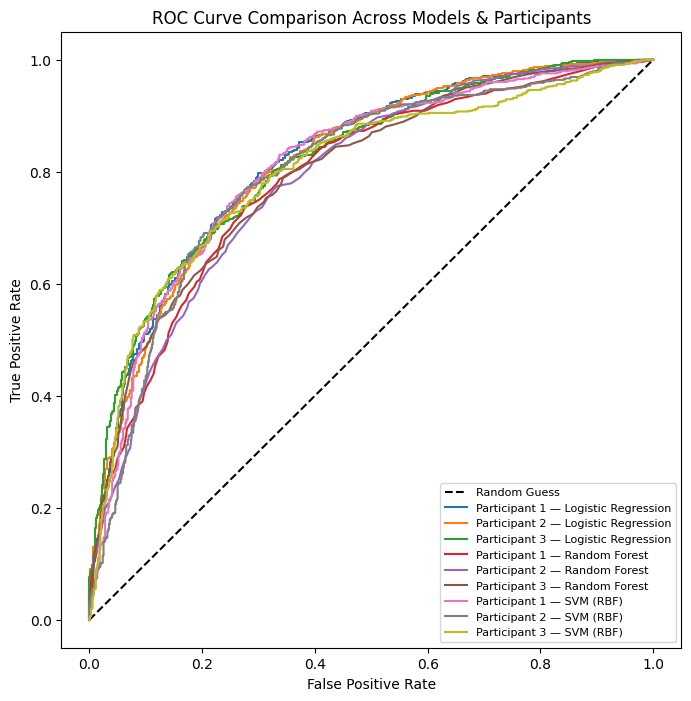

In [61]:
# ===== Train and plot ROC curves =====
plt.figure(figsize=(8, 8))
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

for model_name, model in models.items():
    for participant_name, X in participants.items():
        _, fpr, tpr = train_and_evaluate(X, y, model, model_name, participant_name)
        plt.plot(fpr, tpr, label=f"{participant_name} — {model_name}")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison Across Models & Participants')
plt.legend(fontsize=8)
plt.show()